# IMport Library

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Import Dataset

In [56]:
path = "C:/Users/julia/Downloads/Country-data(1).csv"
country = pd.read_csv(path)
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [57]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [58]:
# check wether dataset has duplicate data
country[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


# Anaylize the dataset

In [59]:
object_col = country.select_dtypes(include= 'object').columns
numerical_col = country.select_dtypes(exclude = 'object').columns

In [60]:
# show the country which has the higher gdp
country1 = country.sort_values(by= 'gdpp', ascending= False).reset_index(drop = True)
# top 5 gdpp country
top5 = country1.country[0:5]

### Show the histplot of variables

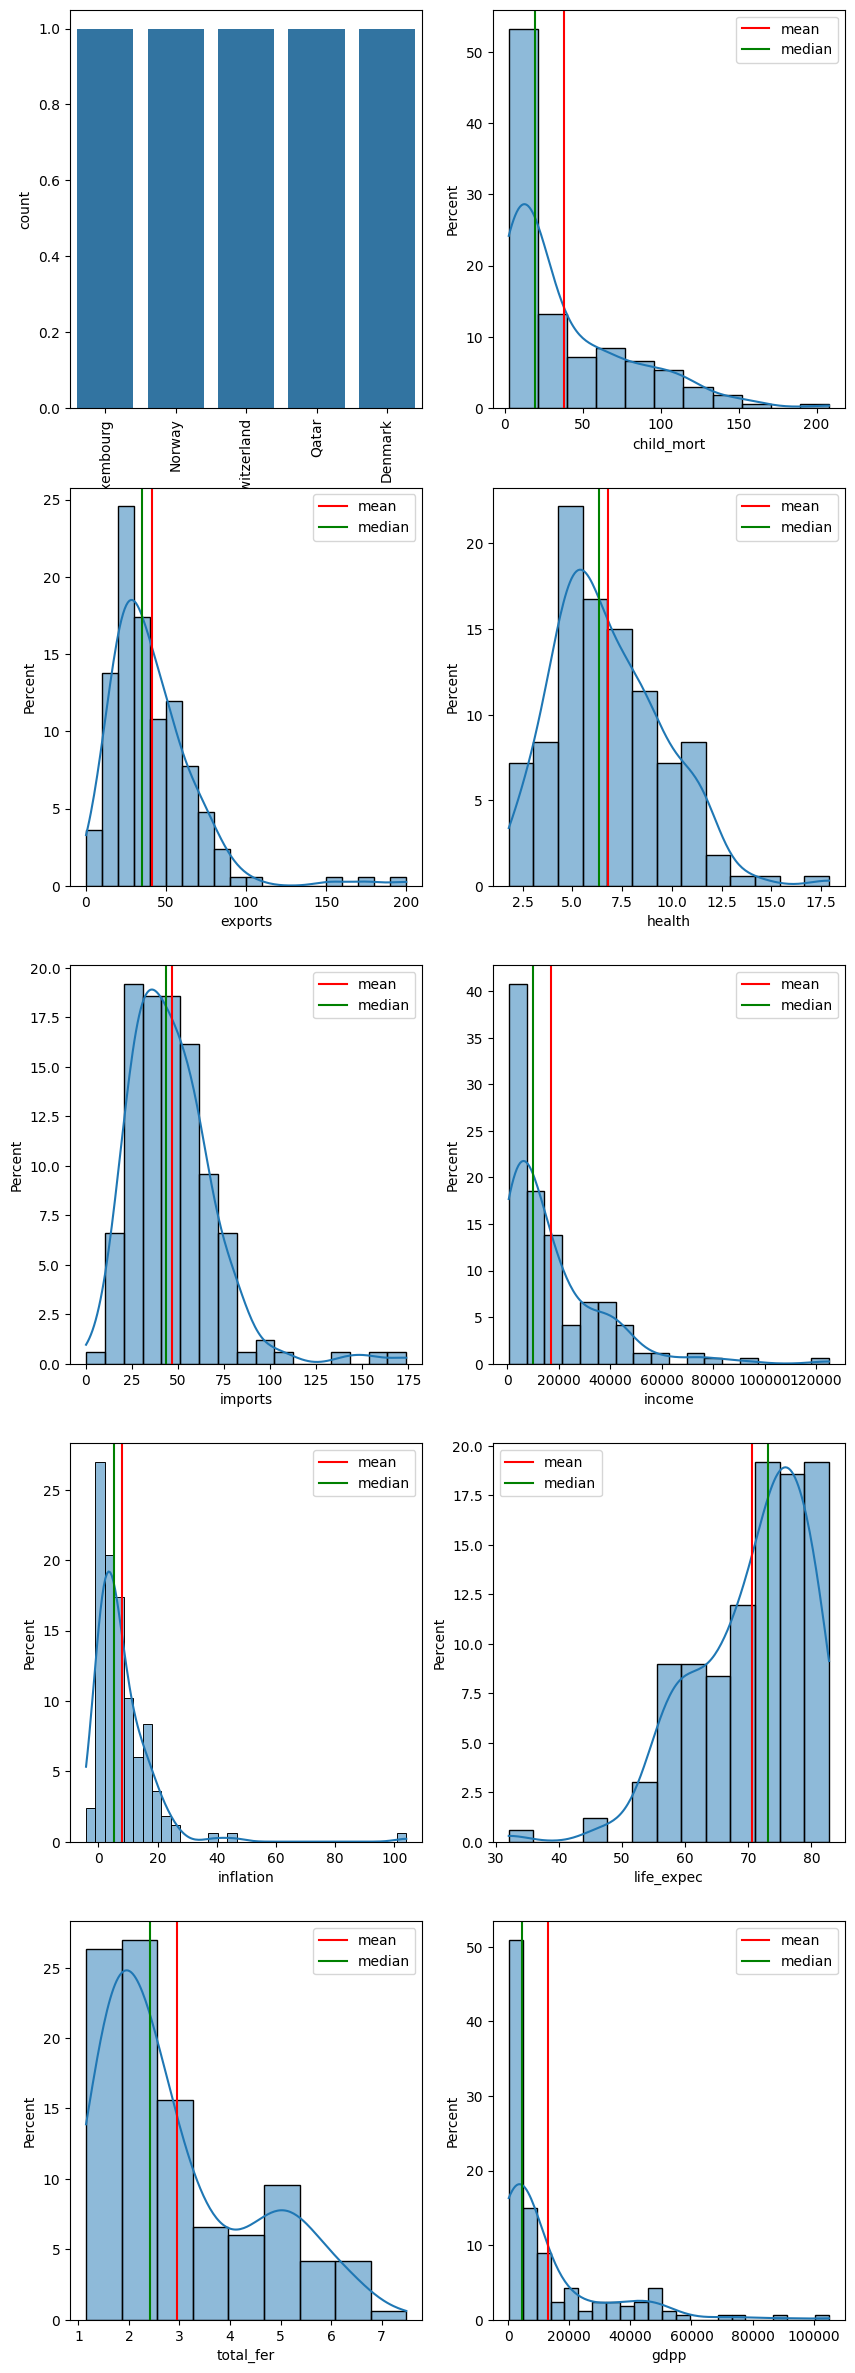

In [61]:
fig, axes = plt.subplots(ncols= 2, nrows = 5, figsize = (10, 30))
axes = np.ravel(axes)
for i,j in enumerate(country.columns):
  if j in numerical_col:
    p = sns.histplot(data = country, x = j, ax= axes[i], kde= True, stat= 'percent')
    p.axvline(x = country[j].mean(), color = 'red', label = 'mean')
    p.axvline(country[j].median(), color = 'green', label = 'median')
    p.legend()
  else:
    p = sns.countplot(data = country1[0:5], x = j, ax = axes[i])
    p.set_xticks(top5)
    p.set_xticklabels(labels = top5, rotation = 90)
plt.show()

# Heatmap for variables

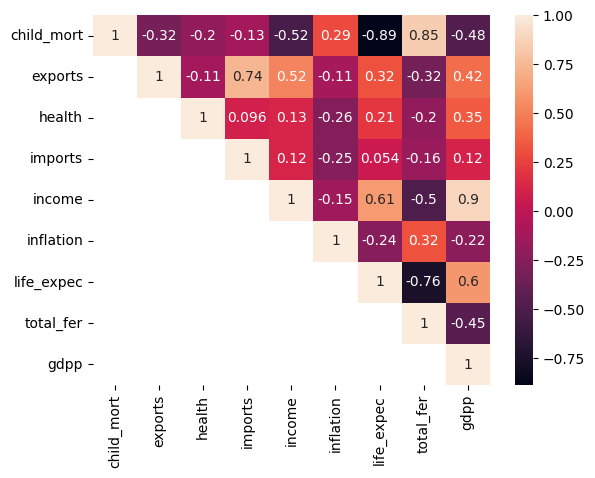

In [62]:
# remove the country name form country
country2 = country.copy()
country2.drop(columns = 'country', inplace = True)
# correlation matrix
corr = country2.corr()
one = np.ones_like(corr)
mask = np.tril(one, k = -1)
sns.heatmap(corr, annot= True, mask = mask)
plt.show()

# Standardize the dataset

In [63]:
std = StandardScaler()
country2_std = country2.copy()
country2_std = country2_std.astype('float')
country2_std.loc[:,:] = std.fit_transform(country2_std.loc[:,:])


# PCA

In [64]:
pca = PCA(2)
country2_pca = pca.fit_transform(country2_std)
# the relation of new variable and original variables
pd.DataFrame(pca.components_, index = pca.get_feature_names_out(), columns= country2.columns).T

,pca0,pca1
child_mort,-0.419519,0.192884
exports,0.283897,0.613163
health,0.150838,-0.243087
imports,0.161482,0.671821
income,0.398441,0.022536
inflation,-0.193173,-0.008404
life_expec,0.425839,-0.222707
total_fer,-0.403729,0.155233
gdpp,0.392645,-0.046022


In [65]:
country2_pca = pd.DataFrame(country2_pca, columns= pca.get_feature_names_out())

In [66]:
# calculate the raton of sum 
pca.explained_variance_ratio_.sum()

0.6313336543771412

# Plot the country map after PCA

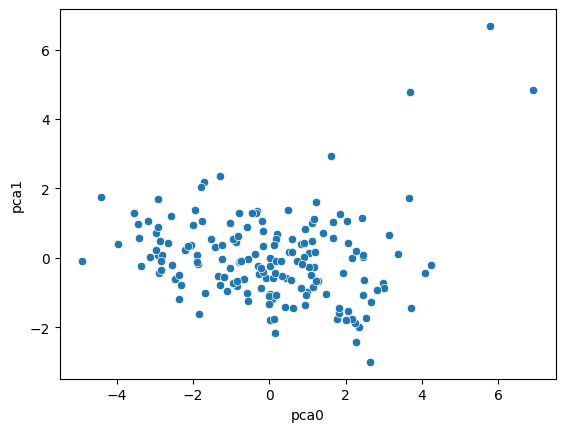

In [67]:
sns.scatterplot(data = country2_pca, x = 'pca0', y = 'pca1')
plt.show()

### Not very clear of cluster, so not going to use PCA

# KMEANS with cluster = 3

In [68]:
kmeans = KMeans(n_clusters= 3,init = 'k-means++', random_state= 1)
kmeans.fit(country2_std)

# add the labels to country2_std
country3 = country2_std.copy()
country3['kmean_labels'] = kmeans.labels_

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


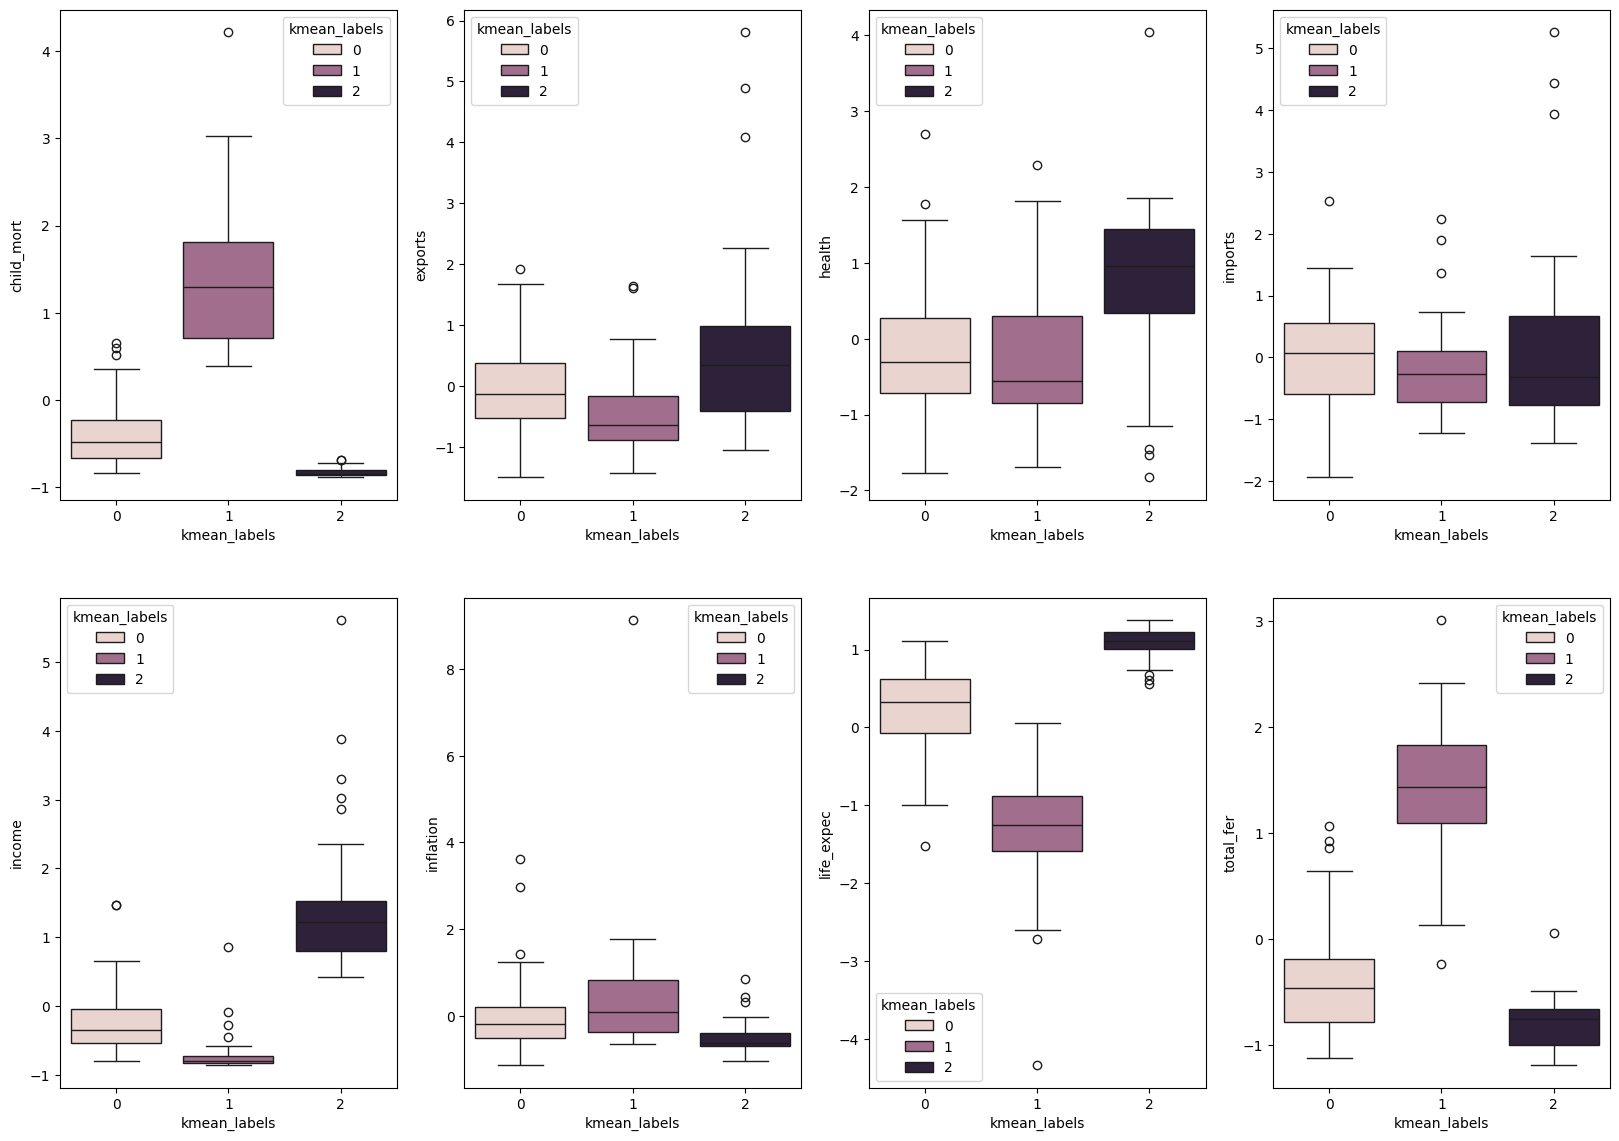

In [69]:
# ususally the country can be bucked by gdpp, so we want to see how data are bucked according to other variables 
cond = (country3.columns == 'gdpp')|(country3.columns == 'kmean_labels')
non_gdpp_col = country3.columns[~cond]
# plot boxplot of different variables in non gdp col
fig, axes = plt.subplots(2, 4, figsize = (20, 14))
axes = np.ravel(axes)
for i, j in enumerate(non_gdpp_col):
  sns.boxplot(data = country3, x = 'kmean_labels', y = j, hue = 'kmean_labels', ax = axes[i])
plt.show()

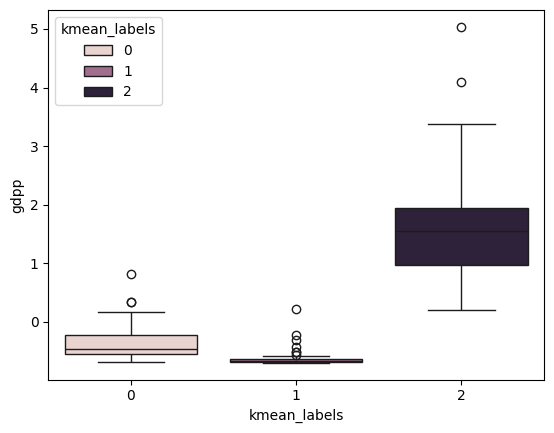

In [70]:
sns.boxplot(data = country3, x = 'kmean_labels', y = 'gdpp', hue = 'kmean_labels')
plt.show()

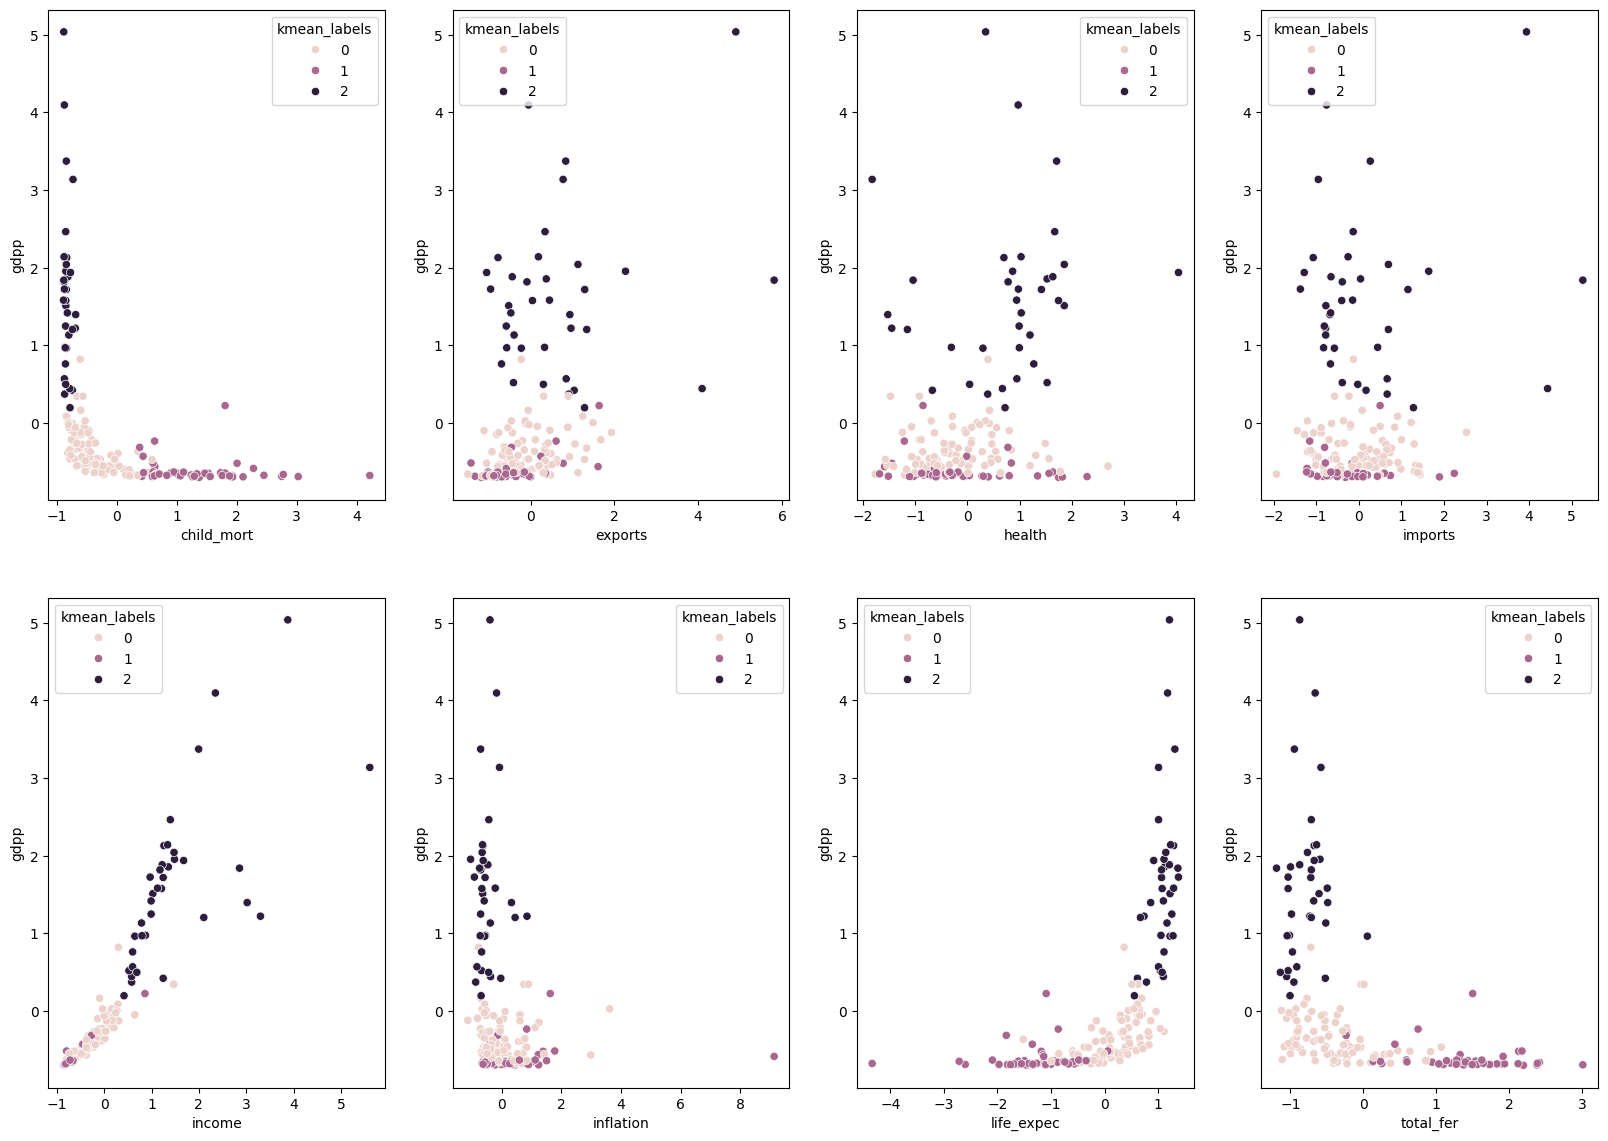

In [71]:
# check different gdpp vs other variables 
fig, axes = plt.subplots(2, 4, figsize = (20, 14))
axes = np.ravel(axes)
for i, j in enumerate(non_gdpp_col):
  sns.scatterplot(data = country3, x = j, y = 'gdpp', hue = 'kmean_labels', ax= axes[i])
plt.show()

# Self definition function

In [72]:
def silhouette_plot(num_clu, data_std):
  kmeans = KMeans(num_clu, init = 'k-means++')
  kmeans.fit(data_std)
  b = kmeans.labels_
  silhouette_val = silhouette_samples(data_std, labels= b)
  unique_b = np.unique(b)
  y_upper, y_lower = 0,0 
  yticks = []
  sicore = silhouette_score(data_std, b)
  for i in unique_b:
    y_upper = y_lower +len(silhouette_val[b== i])
    plt.barh(y = range(y_lower, y_upper), width= np.sort(silhouette_val[b == i]), height = 1)
    y_middle = (y_lower +y_upper)/2
    y_lower = y_lower +len(silhouette_val[b==i])
    yticks.append(y_middle)
  plt.yticks(yticks, unique_b)
  plt.axvline(x = sicore)
  plt.text(x = sicore, y = 0, s = f'silhouette score = {np.round(sicore,2)}')
  plt.xlabel(f'{num_clu} clusters')
  plt.show()

## Use silhouette score to choes the number of cluster

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


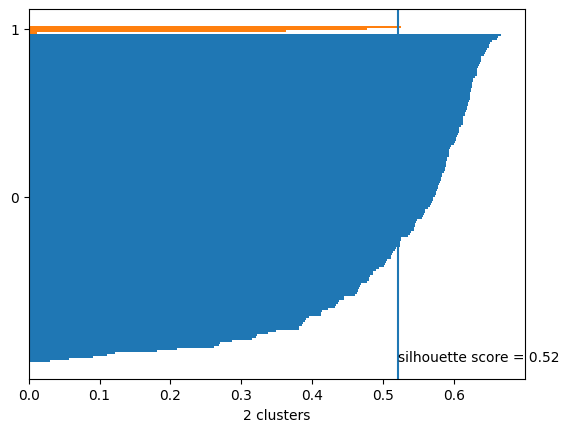

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


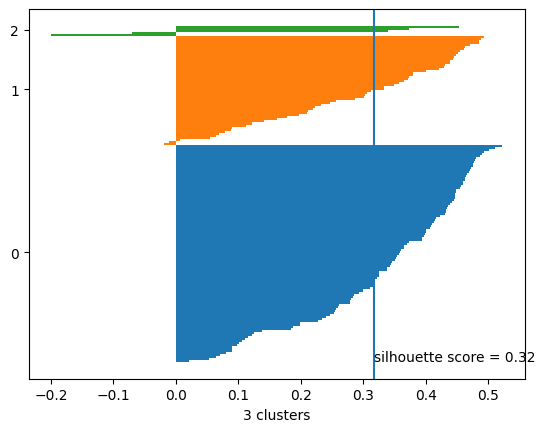

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


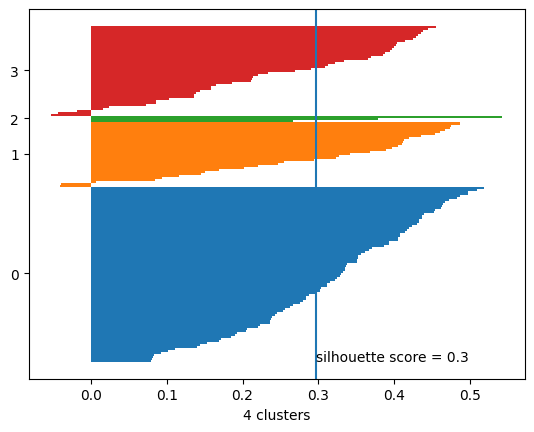

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


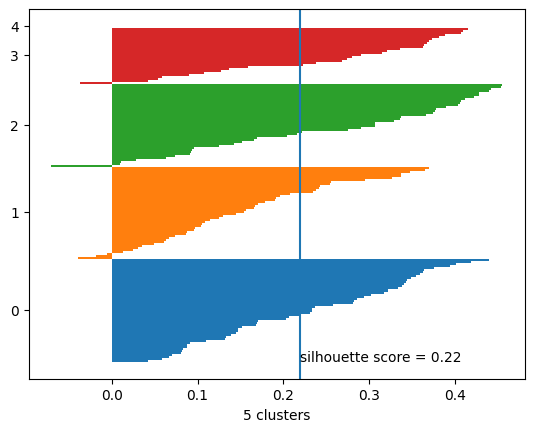

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


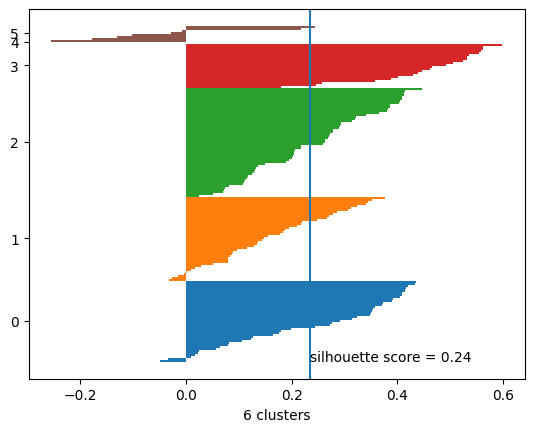

In [73]:
for i in range(2,7):
  silhouette_plot(i, country2_std)

In [135]:
# It seems that it is the best option when the number of cluster is 4
kmeans = KMeans(n_clusters= 4)
kmeans.fit(country2_std)
kmean_labels = kmeans.labels_


c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


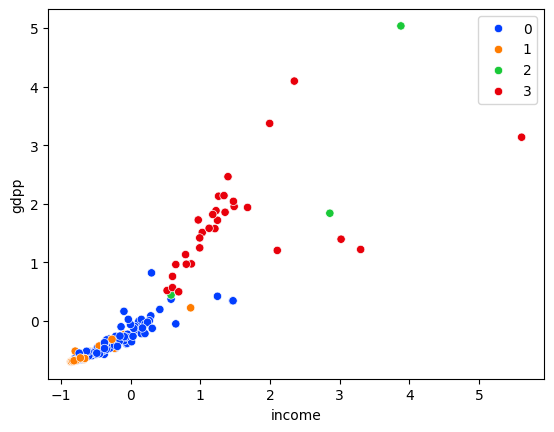

In [136]:
# plot clusters by using kmeans wehn number of cluster is 4
sns.scatterplot(data = country2_std, x = 'income', y = 'gdpp', hue = kmean_labels, palette= 'bright')
plt.show()

In [229]:
# add kmeans_labels to country2_std
country2_labels = country2_std.copy()
country2_labels['kmean_labels'] = kmean_labels
country2_labels['kmean_labels'].value_counts()

kmean_labels
0    88
1    46
3    30
2     3
Name: count, dtype: int64

# Hierachical Clustering

In [74]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

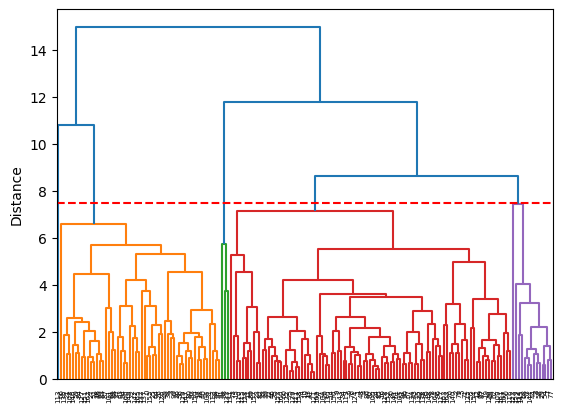

In [75]:
# calculate the linkage (the distance of each pair according to method)
Z = hierarchy.linkage(y = country2_std, method = 'complete', metric = 'euclidean')

# set a color threshold for cluster 
threshold = Z[:,2].max() * 0.5
# plot the dendrogram 
den = hierarchy.dendrogram(Z, color_threshold= threshold)
plt.axhline(y = threshold, linestyle = '--', color = 'red')
plt.ylabel('Distance')
plt.show()



## Plot the clusters

In [76]:
m = len(np.unique(den['color_list'])) -1

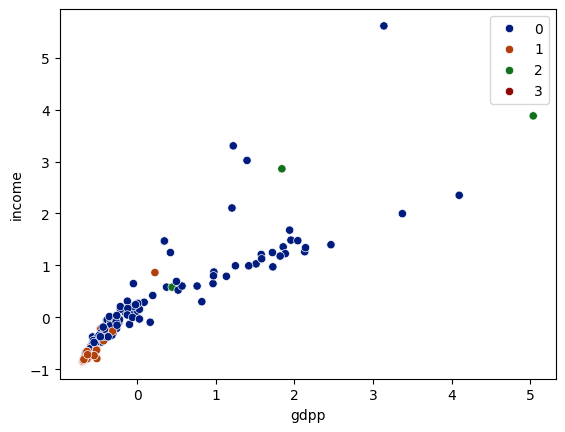

In [226]:
ag= AgglomerativeClustering(n_clusters= m, linkage = 'complete')
ag.fit(country2_std)
ag_labels = ag.labels_
# plot the clusters
sns.scatterplot(data = country2_std, x = 'gdpp', y = 'income', hue= ag_labels, palette= 'dark')
plt.show()

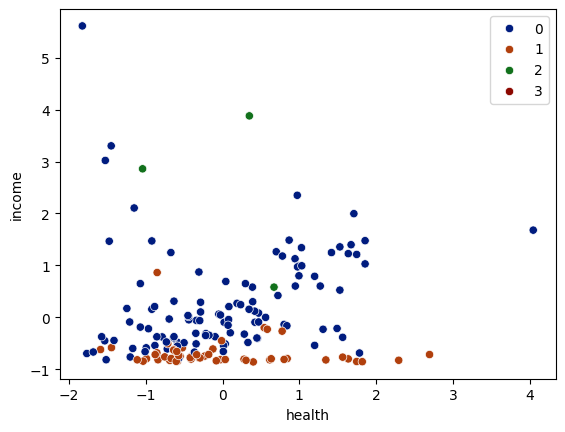

In [227]:
sns.scatterplot(data = country2_std, x = 'health', y = 'income', hue= ag_labels, palette= 'dark')
plt.show()

In [228]:
# add ag_labels to country2_labels 
country2_labels['ag_labels'] = ag_labels
country2_labels['ag_labels'].value_counts()

ag_labels
0    109
1     54
2      3
3      1
Name: count, dtype: int64

# DBSCAN

### drawbacks : have to find the best eps,

In [206]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neighbour = NearestNeighbors(n_neighbors=2)
neighbour.fit(country2_std)
distance, indice = neighbour.kneighbors(country2_std)


In [208]:
distance = np.sort(distance, axis= 0)
# the distance of nearest neighbour of 5th
dist = distance[:,1]
# find the distance which has the most curve of distance
pair = zip(dist[0:-1], dist[1:])
difference = [b- a for a, b in pair]
# find the biggest difference and the distance according
argmax = np.argmax(difference)
eps = dist[argmax]
eps


4.003786150825549

In [197]:
# # use kneed to find the most curve of dist
# from kneed import knee_locator
# knee = knee_locator(x = range(1, len(dist)+1),y = dist, S = 1.0, curve=  'concave', direction=  'increasing')

In [213]:
dbscan = DBSCAN(eps = eps, min_samples= 5)
dbscan.fit(country2_std)
db_label = dbscan.labels_

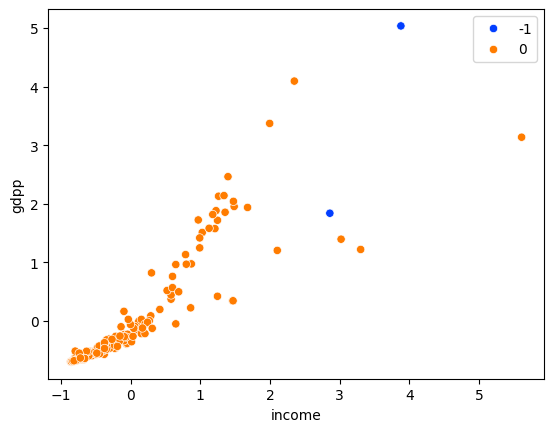

In [214]:
# plot the cluster
sns.scatterplot(data =country2_std, x = 'income', y = 'gdpp', hue = db_label, palette= 'bright' )
plt.show()

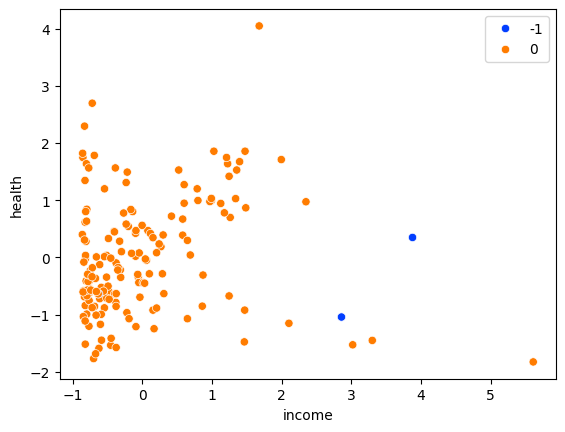

In [215]:
sns.scatterplot(data =country2_std, x = 'income', y = 'health', hue = db_label, palette= 'bright' )
plt.show()

In [216]:
# add db_labels to country2_labels
country2_labels['db_labels'] = db_label
country2_labels['db_labels'].value_counts()

db_labels
 0    164
-1      3
Name: count, dtype: int64

# Gaussian Mixture Model

In [146]:
from sklearn.mixture import GaussianMixture

In [230]:
gauss = GaussianMixture(n_components= 4)
gauss.fit(country2_std)
gauss_label = gauss.predict(country2_std)

c:\Users\julia\miniconda3\envs\pythontest1\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


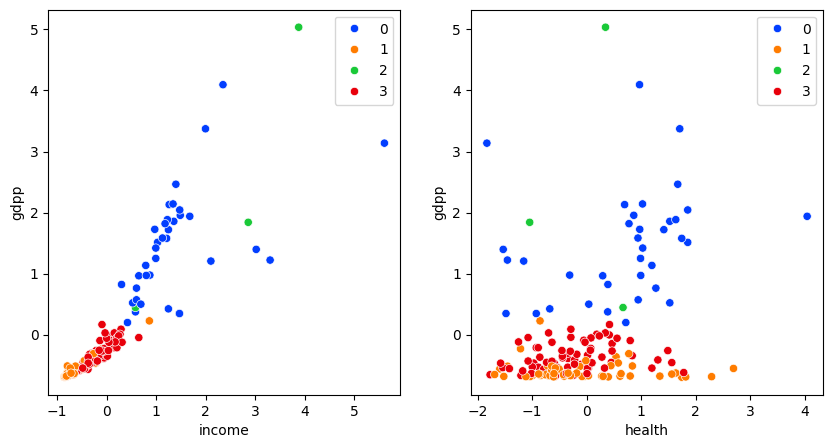

In [151]:
# add gauss_label to country2_label
country2_labels['gauss_labels'] = gauss_label
# plot the income and gdpp , health and gdpp
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes = np.ravel(axes)
col = ['income', 'health']
for i, j in enumerate(col):
  sns.scatterplot(data = country2_std, x = j, y = 'gdpp', hue = gauss_label, palette= 'bright', ax = axes[i])
plt.show()

In [152]:
country2_labels['gauss_labels'].value_counts()

gauss_labels
3    72
1    56
0    36
2     3
Name: count, dtype: int64

# HDBSCAN

In [222]:
from sklearn.cluster import HDBSCAN
hdb = HDBSCAN(min_cluster_size= 4)
hdb.fit(country2_std)
hdb_labels = hdb.labels_
country2_labels['hdb_labels'] = hdb_labels

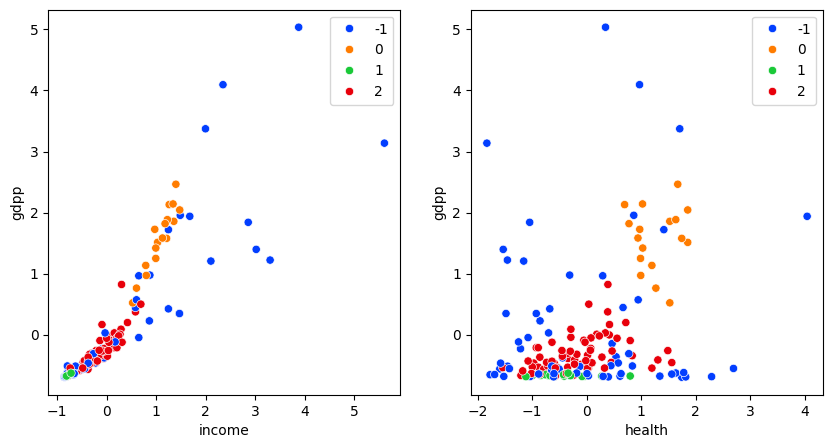

In [224]:
# plot the cluster
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
axes = np.ravel(axes)
for i, j in enumerate(col):
  sns.scatterplot(data = country2_std, x = j, y = 'gdpp', hue = hdb_labels, palette= 'bright', ax = axes[i])
plt.show()

In [225]:
country2_labels['hdb_labels'].value_counts()

hdb_labels
 2    70
-1    63
 1    17
 0    17
Name: count, dtype: int64